In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

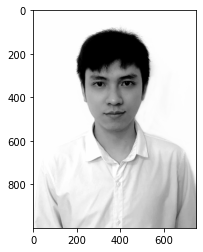

In [2]:
img = cv2.imread('huy.jpg', 0)
plt.imshow(img, cmap = 'gray')

In [3]:
def plot_phan_doan(img_goc, img_phan_doan):
    # Vẽ và hiển thị ảnh gốc, histogram ảnh gốc và ảnh phân đoạn
    fig2 = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
    #Tạo 4 vùng vẽ con
    (ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
    # Hiển thị ảnh gốc
    ax1.imshow(img_goc, cmap='gray')
    ax1.set_title('Ảnh gốc')
    ax1.axis('off')

    # Hiển thị histogram ảnh gốc
    ax2.hist(img_goc.flatten(),bins=256)
    ax2.set_title('Hitogram ảnh gốc')

    # Hiển thị ảnh phân đoạn
    ax3.imshow(img_phan_doan, cmap='gray')
    ax3.set_title('Ảnh phân đoạn dựa vào tìm ngưỡng cơ bản')
    ax3.axis('off')

    # Hiển thị histogram ảnh phân đoạn
    ax4.hist(img_phan_doan.flatten(), bins=256)
    ax4.set_title('Hitogram ảnh phân đoạn')
    plt.show()

## Phân đoạn cắt ngưỡng 

In [4]:
def phan_doan_bang_cat_nguong(img,nguong): # Định nghĩa hàm phân đoạn bằng cắt ngưỡng
    m, n = img.shape
    img_phan_doan_cat_nguong = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            if (img[i,j] < nguong):
                img_phan_doan_cat_nguong[i,j] = 0
            else:
                img_phan_doan_cat_nguong[i,j] = 225   # tương đương giá trị 1 trong trong công thức
    return img_phan_doan_cat_nguong

Ngưỡng tìm được:  151.89022327316925


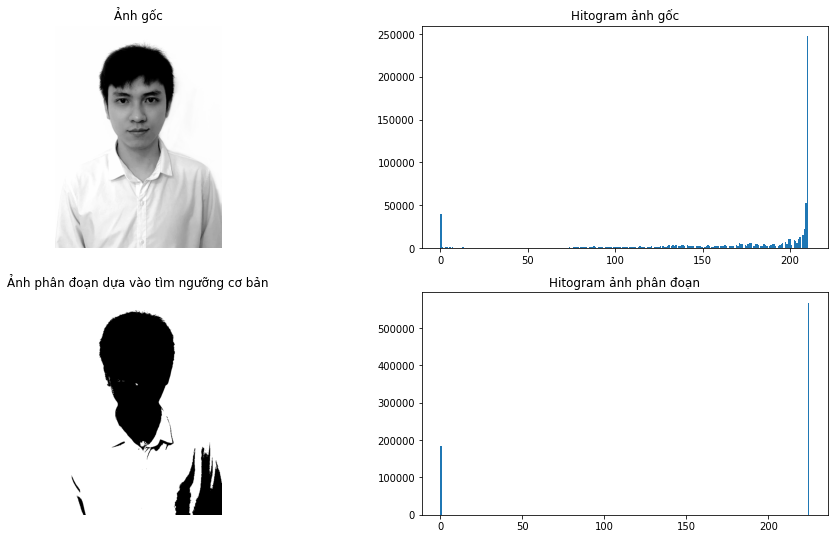

In [5]:
def Tim_nguong_toan_cuc(img): # Định nghĩa hàm tìm ngưỡng
    #Bước 1. Khởi tạo ngưỡng ban đầu t bằng giá trị trung bình mức xám của ảnh
    t=np.mean(img) #initial condition
    g1 = []  # Định nghĩa nhóm g1
    g2 = []  # Định nghĩa nhóm g2
    m,n = img.shape
    # Lặp để tính ngưỡng
    while (True):
        # Bước 2. Tạo nhóm g1,g2 dựa trên ngưỡng t
        for i in range(m):
            for j in range(n):
                if (img[i,j] < t):
                    g1.append(img[i,j])
                else:
                    g2.append(img[i,j])
        # Bước 3. Tính trung bình mức xám trong vùng g1,g2
        mu1 = np.mean(g1)
        mu2 = np.mean(g2)
        # Bước 4. Tính lại ngưỡng t có giá trị mới
        t = ((mu1+ mu2)/2)
        # Tính delta t để làm điều kiện thoát vòng lặp
        t0 = t
        delta_t = abs(t-t0)
        if(delta_t < 1):
            break
    print("Ngưỡng tìm được: ",t)
    return t


img_goc=img
nguong = Tim_nguong_toan_cuc(img_goc)
img_phan_doan = phan_doan_bang_cat_nguong(img_goc,nguong)
plot_phan_doan(img_goc, img_phan_doan)

Ngưỡng tìm được 126


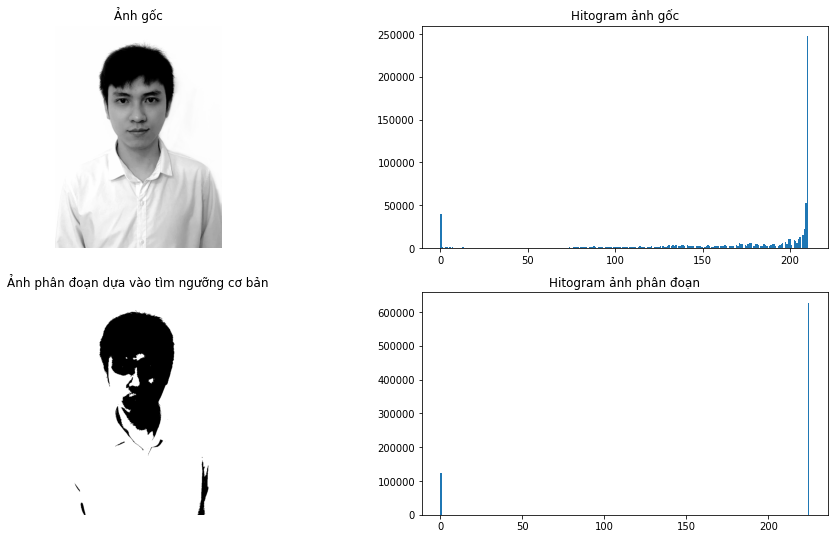

In [6]:
def otsu(img):
    phuong_sai_t = 0 # Khởi tạo biến phuong_sai_t lưu giá trị phương sai để so sánh
                     # giá trị phương sai thuật toán tính được để xác định
                     # phương sai cực đại, trên cơ sở đó xác định ngưỡng tối ưu cần tìm
    M,N = img.shape
    mG = np.mean(img)   # Tính mG giá trị trung bình mức xám của ảnh theo công thức 6

    for nguong in range(256):
#         print(nguong)
        Tong_gt_xam_A = 1  #Khởi tạo biến lưu tổng giá trị mức xám của nhóm A
        Tong_gt_xam_B = 1  #Khởi tạo biến lưu tổng giá trị mức xám của nhóm A
        Tong_pixel_A = 1    #Khởi tạo biến lưu tổng số pixel ở nhóm A
        Tong_pixel_B = 1    #Khởi tạo biến lưu tổng số pixel ở nhóm B
        for i in range(M):  #Duyệt qua giá trị xám của mỗi pixel của hình ảnh gốc
            for j in range(N):
                if (img[i,j] >= nguong):  #Nếu pixel có giá trị màu xám > = nguong (nhóm A)
                    Tong_pixel_A = Tong_pixel_A + 1  #Lấy tổng số pixel của phần A
                    Tong_gt_xam_A = Tong_gt_xam_A + img[i,j] # Lấy tổng giá trị xám của nhóm A
                else:     #Nếu pixel có giá trị xám < nguong (nhóm B)
                    Tong_pixel_B = Tong_pixel_B + 1  #Lấy tổng số pixel của nhóm B
                    Tong_gt_xam_B = Tong_gt_xam_B + img[i,j] # Lấy tổng giá trị xám của nhóm B

        P1 = Tong_pixel_A/(M*N) # Tính P1(k) theo công thức 4 và 3
        P2 = Tong_pixel_B/(M*N) # Tính P2(k) theo công thức 4 và 3
        m1 = Tong_gt_xam_A/Tong_pixel_A # Tính m1(k) theo công thức 5
        m2 = Tong_gt_xam_B/Tong_pixel_B # Tính m2(k) theo công thức 5
        phuong_sai = P1*((m1-mG)**2)+P2*((m2-mG)**2) # Tính phương sai theo công thức 7

        if (phuong_sai > phuong_sai_t): # xác định phương sai tối đa theo công thức 8
            phuong_sai_t = phuong_sai
            nguong_toi_uu = nguong  # Để có được ngưỡng tối ưu của phương sai tối đa

    print("Ngưỡng tìm được", nguong_toi_uu)
    return nguong_toi_uu


img_goc=img
nguong= otsu(img_goc)
img_phan_doan=phan_doan_bang_cat_nguong(img_goc,nguong)

plot_phan_doan(img_goc, img_phan_doan)

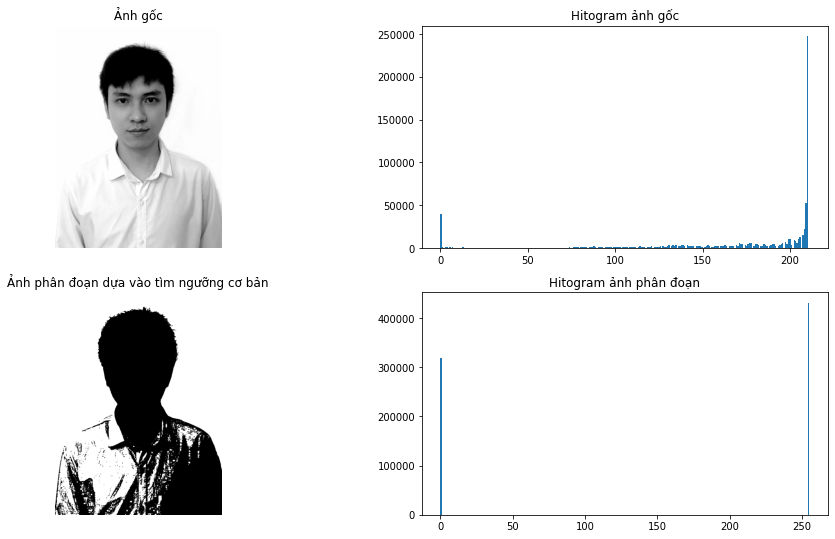

In [7]:
# Phân đoạn ảnh bằng cắt ngưỡng thích nghi dựa trên Thuộc tính vùng ảnh cục bộ
import numpy as np
import cv2
import matplotlib.pyplot as plt

def Phan_doan_lan_can(img, ksize):
    m, n = img.shape
    img_ket_qua_phan_doan = np.zeros([m, n])
    h=(ksize -1) // 2
    a=20
    b=1
    padded_img = np.pad(img, (h, h), mode='reflect')
    mG = np.mean(padded_img)   # Bước 1. Tính trung bình mức xám ảnh
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            Do_lech_chuan = np.std(vung_anh_kich_thuoc_k) # Bước 1. Tính độ lệch chuẩn cục bộ
            T= a*Do_lech_chuan + b*mG   # Bước 2. Tính ngưỡng theo công thức 11
            if padded_img[i, j] > T:    # Bước 3. Cắt ngưỡng theo công thức 12
                img_ket_qua_phan_doan[i, j] = 255
            else:
                img_ket_qua_phan_doan[i, j] = 0
    return img_ket_qua_phan_doan

ksize =3
img_ket_qua = Phan_doan_lan_can(img_goc, ksize)
plot_phan_doan(img_goc, img_ket_qua)

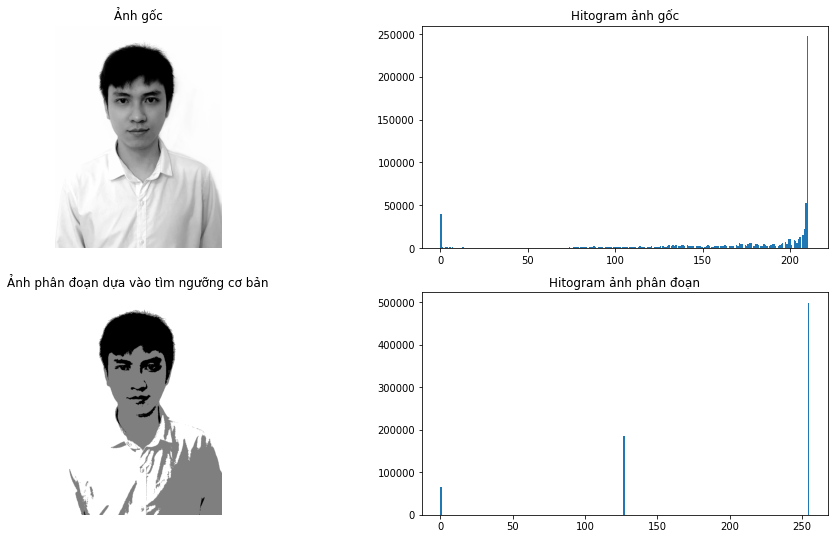

In [8]:
def phan_doan_bang_cat_nguong(img,T1,T2): # Định nghĩa hàm phân đoạn bằng cắt ngưỡng
    m, n = img.shape
    img_phan_doan_cat_nguong = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            if (img[i,j] < T1):
                img_phan_doan_cat_nguong[i,j] = 0
            elif (img[i,j] < T2):
                img_phan_doan_cat_nguong[i,j] = 127
            else:
                img_phan_doan_cat_nguong[i, j] = 255
    return img_phan_doan_cat_nguong\

T1 = 80
T2 = 177
img_phan_doan = phan_doan_bang_cat_nguong(img_goc,T1,T2)
plot_phan_doan(img_goc, img_phan_doan)

## Phân đoạn dựa trên thuộc tính vùng ảnh

In [9]:
# Định nghĩa lớp Point để nhận tọa độ các điểm ảnh
# Các điểm này, sau này để chọn các điểm "hạt giống"

class Point:
    def __init__(self,x,y):
      self.x = x
      self.y = y

    def getX(self):
        return self.x
    def getY(self):
        return self.y

# xác định giá trị mức xám khác nhau của điểm ảnh
def getGrayDiff(img,currentPoint,tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

# Định nghĩa các 8 điểm lân cận để xem xét nở vùng (kết nối)
def selectConnects():
    connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), Point(0, 1), Point(-1, 1), Point(-1, 0)]
    return connects

# Định nghĩa hàm regionGrow để thực hiện nở vùng
def regionGrow(img,seeds,thresh): # img: ảnh; seeds: danh sách điểm hạt giống; thresh: ngưỡng
    m, n = img.shape
    seedMark = np.zeros([m, n]) # Tạo mảng để đánh dấu các điểm hạt gống,
                                 # Tức là, mảng này chứa ảnh ảnh và có các điểm hạt giống
    seedList = [] # Tạo danh sách chứa điểm hạt giống
    for seed in seeds:
        seedList.append(seed)      # Thêm các điểm hạt giống vào danh sách chứa điểm hạt giống
    label = 1                     # khởi tạo nhãn có giá trị = 1
    connects = selectConnects()   # Tạo các kết nối với 8 điểm lân cận
    while(len(seedList)>0): # Lặp qua danh sách chứa điểm hạt giống seedList
          # lấy điểm hạt giống đầu tiên trong danh sách chứa điểm hạt giống
          currentPoint = seedList.pop(0)
          # đánh dấu (gán nhãn) cho điểm hạt giống
          seedMark[currentPoint.x,currentPoint.y] = label
          for i in range(8):    # xem xét (lặp qua) 8 điểm lân cận
               tmpX = currentPoint.x + connects[i].x
               tmpY = currentPoint.y + connects[i].y
               if tmpX < 0 or tmpY < 0 or tmpX >= m or tmpY >= n:
                    continue
               # Tính sự sai khác nhau giá trị mức xám của điểm ảnh hiện tại
               # với từng điểm (8 điểm) lân cận nó
               grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
               # Nếu nhỏ hơn ngưỡng và trong vùng ảnh gốc
               if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                    # Đánh dấu điểm đó thành điểm hạt giống và gán nhãn
                    seedMark[tmpX,tmpY] = label
                    # Thêm điểm được đánh dấu vào danh sách điểm hạt giống
                    seedList.append(Point(tmpX,tmpY))
     # Trả về ảnh có chứa các điểm hạt giống (được gán nhãn) là ảnh phân đoạn
    return seedMark

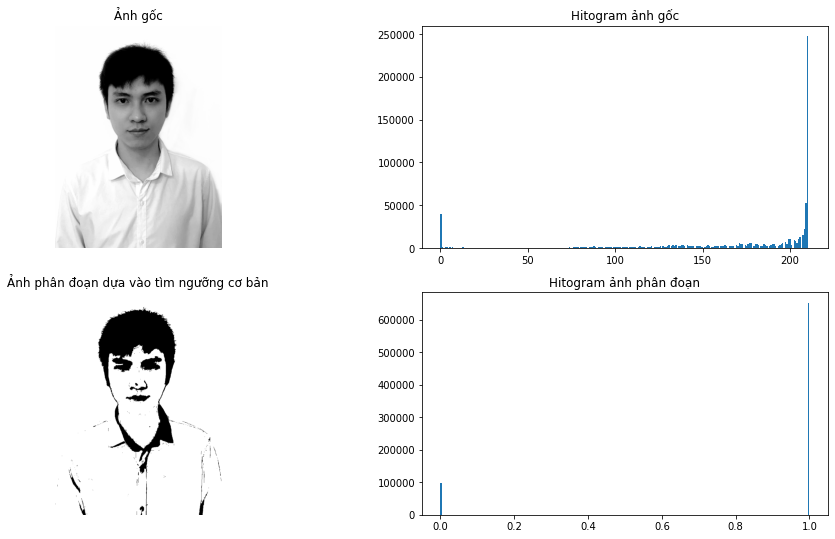

In [11]:
seeds = [Point(10, 10), Point(300, 400), Point(100, 300)]
# Thực hiện tăng vùng bằng cách gọi hàm regionGrow
img_phan_doan = regionGrow(img, seeds, 3)  #5: là giá trị ngưỡng, gía trị này thay đổi phụ thuộc ảnh ta quy định
plot_phan_doan(img_goc, img_phan_doan)

### Phan-doan-anh-Split-and-Merge

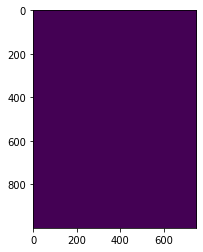

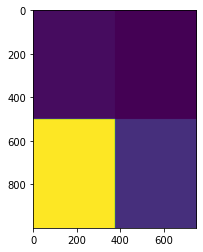

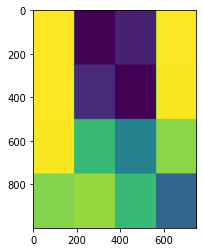

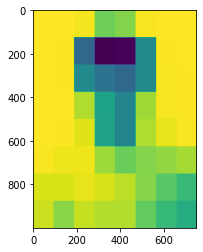

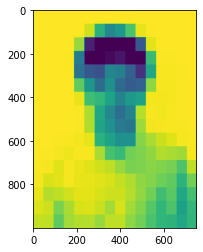

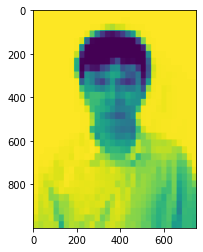

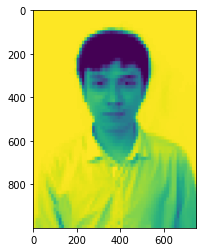

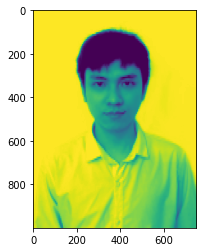

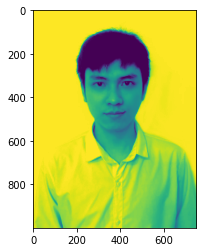

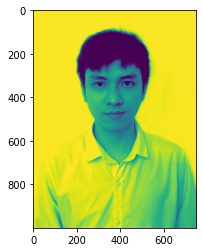

In [18]:
from operator import add
from functools import reduce
def split4(img):
    half_split = np.array_split(img, 2)
    res = map(lambda x: np.array_split(x, 2, axis=1), half_split)
    return reduce(add, res)

def concatenate4(north_west, north_east, south_west, south_east):
    top = np.concatenate((north_west, north_east), axis=1)
    bottom = np.concatenate((south_west, south_east), axis=1)
    return np.concatenate((top, bottom), axis=0)

def calculate_mean(img):
    return np.mean(img, axis=(0, 1))

def checkEqual(myList):
    first=myList[0]
    return all((x==first).all() for x in myList)

class QuadTree:
    def insert(self, img, level=0):
        self.level = level
        self.mean = calculate_mean(img).astype(int)
        self.resolution = (img.shape[0], img.shape[1])
        self.final = True

        if not checkEqual(img):
            split_img = split4(img)

            self.final = False
            self.north_west = QuadTree().insert(split_img[0], level + 1)
            self.north_east = QuadTree().insert(split_img[1], level + 1)
            self.south_west = QuadTree().insert(split_img[2], level + 1)
            self.south_east = QuadTree().insert(split_img[3], level + 1)

        return self

    def get_image(self, level):
        if (self.final or self.level == level):
            return np.tile(self.mean, (self.resolution[0], self.resolution[1], 1))

        return concatenate4(
            self.north_west.get_image(level),
            self.north_east.get_image(level),
            self.south_west.get_image(level),
            self.south_east.get_image(level))

quadtree = QuadTree().insert(img)
for i in range(10):
    plt.imshow(quadtree.get_image(i))
    plt.show()